In [93]:
import pandas as pd 
import numpy as np
from pandas_datareader import data, wb
import pandas_datareader as pdf
import datetime
import matplotlib.pyplot as plt

In [121]:
MOMENTUM_DAYS = 180 # 6개월

now = datetime.datetime.now()
start_time = datetime.datetime(2020, 1, 1, 9, 0, 0)
end_time = datetime.datetime(2021, 1, 1, 9, 0, 0)
#EST = datetime.timezone(datetime.timedelta(hours=-5))
#start_time = datetime.datetime(2020, 1, 1, 9, 0, 0, tzinfo=EST)
#start_time = datetime.datetime.strptime("20200101", "%Y%m%d")
#end_time = datetime.datetime.strptime("20210101", "%Y%m%d")
#start_time = now - datetime.timedelta(weeks=52) # 1년 전으로 start 설정
#end_time = now - datetime.timedelta(weeks=4) # 1달 전으로 end 설정
head_start_time = start_time - datetime.timedelta(days=MOMENTUM_DAYS)
head_end_time = start_time - datetime.timedelta(days=1)
ticker_list = [
    { "code": "SPY", "name": "S&P500"},
    { "code": "QQQ", "name": "Nasdaq"},
    { "code": "^KS11", "name": "Kospi"},
    { "code": "005930.KS", "name": "Samsung"}
]

In [3]:
def convert_price(x):
    return x/x.iloc[0]*100
    
def get_rate_of_return(x):
    return round((x.iloc[-1]-x.iloc[0]),2)

# 데이터 탐색

In [4]:
head_data = pdf.data.get_data_yahoo("SPY", head_start_time, head_end_time)
print(len(head_data))
head_data.tail()

125


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,321.519989,320.899994,321.470001,321.230011,20270000.0,313.286652
2019-12-26,322.950012,321.640015,321.649994,322.940002,30911200.0,314.954376
2019-12-27,323.799988,322.279999,323.739990,322.859985,42528800.0,314.876373
2019-12-30,323.100006,320.549988,322.950012,321.079987,49729100.0,313.140411
2019-12-31,322.130005,320.149994,320.529999,321.859985,57077300.0,313.901062


In [5]:
ticker_data = pdf.data.get_data_yahoo("SPY", start_time, end_time)
print(len(ticker_data))
ticker_data.head()

253


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,324.890015,322.529999,323.540009,324.869995,59151200.0,316.836670
2020-01-03,323.640015,321.100006,321.160004,322.410004,77709700.0,314.437500
2020-01-06,323.730011,320.359985,320.489990,323.640015,55653900.0,315.637115
2020-01-07,323.540009,322.239990,323.019989,322.730011,40496400.0,314.749573
2020-01-08,325.779999,322.670013,322.940002,324.450012,68296000.0,316.427063


In [95]:
total_data = pd.concat([head_data, ticker_data])
print(len(total_data))
total_data.head()

368


,High,Low,Open,Close,Volume,Adj Close,prev_6month_close,prev_6month_rate
Date,,,,,,,,
2019-07-05,2115.429932,2096.229980,2111.000000,2110.590088,459400.0,2110.590088,NaN,NaN
2019-07-08,2092.540039,2063.780029,2091.909912,2064.169922,516000.0,2064.169922,NaN,NaN
2019-07-09,2075.300049,2052.030029,2070.350098,2052.030029,440100.0,2052.030029,NaN,NaN
2019-07-10,2068.199951,2056.479980,2061.550049,2058.780029,355700.0,2058.780029,NaN,NaN
2019-07-11,2088.239990,2070.209961,2070.590088,2080.580078,376700.0,2080.580078,NaN,NaN


In [7]:
prev_6month_data = total_data[:len(ticker_data)]
print(len(prev_6month_data))
print(prev_6month_data.head())
ticker_data['prev_6month_close'] = prev_6month_data['Close'].values
ticker_data.head()

253
                  High         Low        Open       Close      Volume  \
Date                                                                     
2019-07-05  298.640015  296.010010  297.440002  298.459991  51677300.0   
2019-07-08  298.260010  296.220001  297.010010  296.820007  45841800.0   
2019-07-09  297.519989  295.480011  295.540009  297.190002  41101300.0   
2019-07-10  299.660004  297.779999  298.369995  298.609985  58448500.0   
2019-07-11  299.579987  298.200012  299.320007  299.309998  50826100.0   

             Adj Close  
Date                    
2019-07-05  288.324158  
2019-07-08  286.739868  
2019-07-09  287.097229  
2019-07-10  288.469055  
2019-07-11  289.145233  


,High,Low,Open,Close,Volume,Adj Close,prev_6month_close
Date,,,,,,,
2020-01-02,324.890015,322.529999,323.540009,324.869995,59151200.0,316.836670,298.459991
2020-01-03,323.640015,321.100006,321.160004,322.410004,77709700.0,314.437500,296.820007
2020-01-06,323.730011,320.359985,320.489990,323.640015,55653900.0,315.637115,297.190002
2020-01-07,323.540009,322.239990,323.019989,322.730011,40496400.0,314.749573,298.609985
2020-01-08,325.779999,322.670013,322.940002,324.450012,68296000.0,316.427063,299.309998


In [8]:
prev_6month_rate = (ticker_data['Close'] - ticker_data['prev_6month_close'])/ticker_data['prev_6month_close']*100
ticker_data['prev_6month_rate'] = prev_6month_rate.values
ticker_data.head()

,High,Low,Open,Close,Volume,Adj Close,prev_6month_close,prev_6month_rate
Date,,,,,,,,
2020-01-02,324.890015,322.529999,323.540009,324.869995,59151200.0,316.836670,298.459991,8.848758
2020-01-03,323.640015,321.100006,321.160004,322.410004,77709700.0,314.437500,296.820007,8.621385
2020-01-06,323.730011,320.359985,320.489990,323.640015,55653900.0,315.637115,297.190002,8.900034
2020-01-07,323.540009,322.239990,323.019989,322.730011,40496400.0,314.749573,298.609985,8.077434
2020-01-08,325.779999,322.670013,322.940002,324.450012,68296000.0,316.427063,299.309998,8.399323


# Main

In [122]:
for ticker in ticker_list:
    print(ticker["code"])
    head_data = pdf.data.get_data_yahoo(ticker["code"], head_start_time, head_end_time)
    ticker_data = pdf.data.get_data_yahoo(ticker["code"], start_time, end_time)
    total_data = pd.concat([head_data, ticker_data])

    prev_6month_data = total_data[:len(ticker_data)]
    ticker_data['prev_6month_close'] = prev_6month_data['Close'].values
    prev_6month_rate = (ticker_data['Close'] - ticker_data['prev_6month_close'])/ticker_data['prev_6month_close']*100
    ticker_data['prev_6month_rate'] = prev_6month_rate.values
    ticker['data'] = ticker_data

SPY
QQQ
^KS11
005930.KS


In [123]:
ticker_list[0]["data"].head()

,High,Low,Open,Close,Volume,Adj Close,prev_6month_close,prev_6month_rate
Date,,,,,,,,
2020-01-02,324.890015,322.529999,323.540009,324.869995,59151200.0,316.836670,298.459991,8.848758
2020-01-03,323.640015,321.100006,321.160004,322.410004,77709700.0,314.437500,296.820007,8.621385
2020-01-06,323.730011,320.359985,320.489990,323.640015,55653900.0,315.637115,297.190002,8.900034
2020-01-07,323.540009,322.239990,323.019989,322.730011,40496400.0,314.749573,298.609985,8.077434
2020-01-08,325.779999,322.670013,322.940002,324.450012,68296000.0,316.427063,299.309998,8.399323


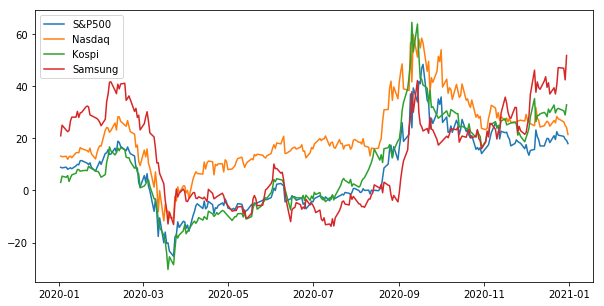

In [124]:
fig = plt.figure(figsize=(10,5))
fig.tight_layout()
subplot = fig.add_subplot(1,1,1)

for ticker in ticker_list:
    ticker_data = ticker['data']
    subplot.plot(ticker_data['prev_6month_rate'], label=ticker['name'])
    subplot.legend()
plt.show()

rate of return 15.09
rate of return 45.14
rate of return 32.1
rate of return 46.74


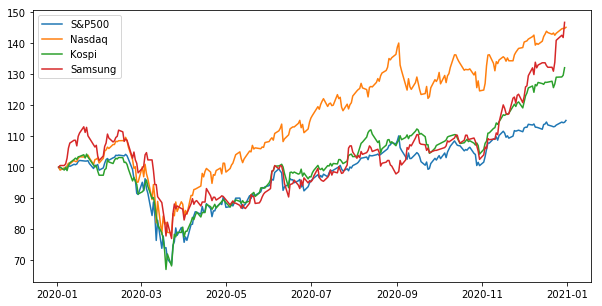

In [125]:
fig = plt.figure(figsize=(10,5))
fig.tight_layout()
subplot = fig.add_subplot(1,1,1)

for ticker in ticker_list:
    ticker_data = ticker['data']
    close_data = ticker_data['Close']
    close_data = convert_price(close_data) # 시작가를 100으로 하여 가격 재산정
    rate_of_return = get_rate_of_return(close_data)
    print("rate of return", rate_of_return)
    subplot.plot(close_data, label=ticker["name"])

subplot.legend()
plt.show()

In [119]:
class AssetItem:
    def __init__(self, code, percent):
        self.code = code
        self.percent = percent
        self.count = 0
        self.price = 0
        self.ammount = 0
        
    def apply_price(self, price):
        self.price = price
        self.eval()
    def eval(self):
        self.amount = self.count * self.price
        
class Asset:
    def __init__(self, assets, cash):
        self.assets = assets
        self.cash = cash
        self.total = cash
        
    def buy(self, code, count):
        asset_item = self.assets[code] # TODO 미존재시
        amount = asset_item.price * count
        self.cash -= amount # TODO cash 부족시
        asset_item.count += count
        asset_item.eval()
        return
        
    def eval(self, code, price):
        self.assets[code].apply_price(price)
        share_total = 0
        for k, v in self.assets.items():
            share_total += v.amount
        self.total = share_total + self.cash
    
class BuyHoldStrategy:
    def __init__(self, assets_shares, cash=10000):
        self.started = False
        self.share_percent = 0
        assets = { }
        
        for k, v in assets_shares.items():
            self.share_percent += v
            assets[k] = AssetItem(k, v)
            
        self.cash_percent = 100 - self.share_percent
        print('share_percent', self.share_percent)
        print('cash_precent', self.cash_percent)
        
        self.asset = Asset(assets, cash)
        self.asset_history = []
    
    def sell(self, code, count):
        return
        
    def add_cash(self, ammount):
        self.cash += ammount
        
    def apply(self, code, idx, row):
        self.asset.eval(code, row['Close'])

        if (not self.started):
            self.asset.buy(code, 10)
            self.started = True
            
        print(self.asset.total)
        return

In [120]:
cash=10000 # 1만달러
rebalance_period=1 # 1개월 단위 rebalancing
spy_data = ticker_list[0]['data']

strategy = BuyHoldStrategy({'SPY': 70}, cash)
for idx, row in spy_data.iterrows():
    strategy.apply('SPY', idx, row)

    

share_percent 70
cash_precent 30
10000.0
9975.400085449219
9987.7001953125
9978.600158691406
9995.800170898438
10017.799987792969
10008.399963378906
10030.800170898438
10025.800170898438
10033.200073242188
10060.500183105469
10070.800170898438
10064.299926757812
10064.700012207031
10068.500061035156
10038.999938964844
9986.300048828125
10020.2001953125
10017.5
10028.099975585938
9968.600158691406
9992.5
10041.900024414062
10079.89990234375
10091.100158691406
10073.300170898438
10098.099975585938
10103.900146484375
10125.500183105469
10121.900024414062
10127.300109863281
10118.600158691406
10134.700012207031
10120.800170898438
10086.100158691406
9975.500183105469
9877.799987792969
9866.300048828125
9726.400146484375
9713.900146484375
9842.200012207031
9753.699951171875
9879.89990234375
9775.899963378906
9725.899963378906
9493.600158691406
9635.500183105469
9494.89990234375
9232.40005493164
9444.500122070312
9149.800109863281
9279.300079345703
9151.300048828125
9156.399993896484
9039.300

In [61]:
dates = pd.date_range("20130101", periods=6)
df = pd.DataFrame(columns=['A', 'B'])
for i in range(5):
    df = df.append(pd.Series({'A':i, 'B':i}, index=df.columns, name=dates[i]))
df.head()

,A,B
2013-01-01,0,0
2013-01-02,1,1
2013-01-03,2,2
2013-01-04,3,3
2013-01-05,4,4
